# SciPy stats Notebook
***

# Overview of Scipy Stats library

[Scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) is a module in SciPy dedicated for statistical functions. 

It is divided into 9 parts as follows ...
1. Probability distribution
2. Summary statistics
3. Frequency statistics
4. Correlation functions: f_oneway(*args[, axis]) Perform one-way ANOVA.
5. Statistical tests
6. Masked statistics
7. Other statistical functions
8. Quasi-Monte Carlo functionality
9. Random variate generation

The module consists of a large number of probability distribution for both continuous and discrete variables, and can work with different types of distributions like the binomial, uniform, and continuous. It also allows user to perform a range of statistical test, for example, T-test, ANOVA, Pearson's r, chi-square test and a lot more. 

# What is ANOVA?
ANOVA, which stands for Analysis of Variance, is a statistical test for analyzing if there is statistically significant difference between the means of **three or more groups**. One-way ANOVA is used when there is one independent variable, while a two-way ANOVA is used for two independent variables.

However ANOVA does not tell us which specific groups are significantly different from each other. Post hoc tests are needed to investigate where the significant difference lies. For data that meets the assumption of homogeneity of variances, Tukey's honestly significant difference (HSD) post hoc test would be a great option.  For data with unequal variances, Games Howell post hoc test can be used [[1]](https://statistics.laerd.com/statistical-guides/one-way-anova-statistical-guide.php). 

At the moment Scipy.stats module does not have the function to perform Tukey's HSD post hoc test, [statsmodels](https://www.statsmodels.org/dev/generated/statsmodels.stats.multicomp.pairwise_tukeyhsd.html) is one of the modules that allow users to do so. However, SciPy has put it into the development road map, hopefully tukey_hsd will soon be available in its coming release [[2]](https://scipy.github.io/devdocs/reference/generated/scipy.stats.tukey_hsd.html?highlight=tukey_hsd#scipy.stats.tukey_hsd). 

## The assumptions of ANOVA 

According to [Laerd Statistics](https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php), there are 6 assumptions that the data to be analyzed should meet in order to derive a valid conclusion from the data. 

1. Dependent variable at interval or ratio level 
2. IV should consist of 2 or more categorical, independent groups
3. Independence of observations, not repeatedly measures
4. No significant outliers, as outlier reduces validity
5. Dependent variable should be approximately normally distributed for each category of independent variable (shapiro-wilk test of normality)
6. homogeneity of variances (Levene's test)


# The Dataset and hypotheis

### The dataset

The dataset is from an imaginary crop yield experiment adopted from [here](https://www.scribbr.com/statistics/one-way-anova/). There are 4 variables in the dataset, planting location (block 1, 2, 3, 4), planting density (1=low, 2=high), types of fertilizer used(type 1,2,3), and crop yield per acre. I am interested in if there is statistically significant differences in yield of the 3 types of fertilizer. 

### The hypothesis
H0: There is no significant difference between the means between yield of the 3 types of fertilizer. <br>
H1: There is significant difference between the means of yield between the 3 types of fertilizer. 

#### Importing necessary packages

In [1]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns

df = pd.read_csv('crop_data.csv')
# have a look of the data frame
df

,density,block,fertilizer,yield
0,1,1,1,177.228692
1,2,2,1,177.550041
2,1,3,1,176.408462
3,2,4,1,177.703625
4,1,1,1,177.125486
...,...,...,...,...
91,2,4,3,177.405292
92,1,1,3,178.141644
93,2,2,3,177.710613
94,1,3,3,177.687264


# Check if the data fits the 6 assumptions of ANOVA

#### Assumption 1 - Dependent variable at interval or ratio level 
In this case the dependent variable is yield, and have a look of its descriptive statistics.

In [2]:
# set the dependent variable as yield
dependent = df['yield']
dependent.describe()

count     96.000000
mean     177.015476
std        0.664548
min      175.360840
25%      176.468696
50%      177.058105
75%      177.398571
max      179.060899
Name: yield, dtype: float64

#### Assumption 2 - Independent variable should consist of 2 or more categorical, independent group
In this case the independent variable is types of fertilizer and there are 3 types.

In [3]:
# show number of fertilizers in the df
df.fertilizer.unique()

array([1, 2, 3], dtype=int64)

In [4]:
# convert the list of int to str for later use
fertilizer = df['fertilizer'].astype('str')
fertilizer

0     1
1     1
2     1
3     1
4     1
     ..
91    3
92    3
93    3
94    3
95    3
Name: fertilizer, Length: 96, dtype: object

In [5]:
# set independent variable as fertilizer
independent = fertilizer
independent.value_counts()

1    32
2    32
3    32
Name: fertilizer, dtype: int64

#### Assumption 3 - Independence of observations
It is an issue related to experiment design and cannot be proven through statistical test. In this case there is no relationship between the observations in each group or between the groups themselves.

#### Assumption 4 - outlier
Boxplot will be used to show if there is any outlier. 

<AxesSubplot:xlabel='yield', ylabel='fertilizer'>

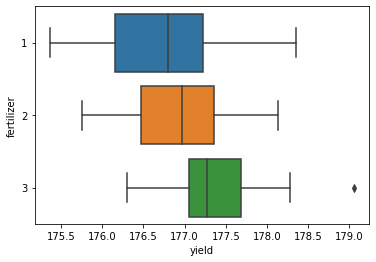

In [6]:
# seaborn boxplot to show outlier
sns.boxplot(x=dependent, y=independent)

There is 1 outlier in fertilizer 3. Let's see if that would cause a problem in the distribution normality assumption. 

#### Assumption 5 - Normality
Dependent variable should be approximately normally distributed for each category of independent variable. Shapiro-Wilk test will be used to test for all 3 types of fertilizer.

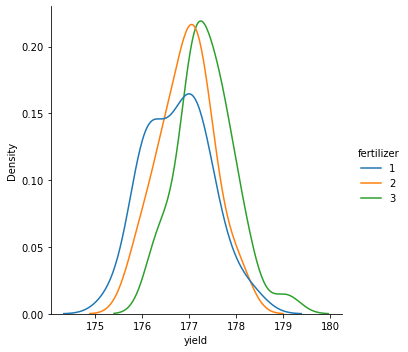

In [7]:
# take a look of the distribution of yield of the 3 types of fertilizer
# KDEs of the 3 categories
sns.displot(x=dependent, hue=independent, kind="kde")

In [8]:
# Shapiro-Wilk test for normality for fertilizer 1
stats.shapiro(dependent[independent == '1'])

ShapiroResult(statistic=0.9791430234909058, pvalue=0.7743139863014221)

In [9]:
#run on fertilizer 2
stats.shapiro(dependent[independent == "2"])

ShapiroResult(statistic=0.9832894802093506, pvalue=0.8874866366386414)

In [10]:
# run on fertilizer 3
stats.shapiro(dependent[independent == "3"])

ShapiroResult(statistic=0.9587748646736145, pvalue=0.25418972969055176)

If the p-value is smaller than 0.05, that means the data is normally distributed.
So yield of all 3 types of fertilizer are actually normally distributed.

#### Assumption 6 - Homogeneity of variances
Levene's test will be used to test.

In [11]:
# Test for equal variances using Levene test
stats.levene(
    dependent[independent == '1'],
    dependent[independent == '2'],
    dependent[independent == '3']
)

LeveneResult(statistic=0.8471814796777352, pvalue=0.43190199882090996)

Small p-value (<0.05) suggests that the population do not have equal variances. So the yield of all 3 types of fertilizer have equal variances. 

**Conclusion:** The data meets all the assumptions, we will move on to run ANOVA.

# Running ANOVA

In [12]:
 # ANOVA
stats.f_oneway(dependent[independent == '1'], dependent[independent == '2'], dependent[independent == '3'])

F_onewayResult(statistic=7.862751645215487, pvalue=0.0006999157502874401)

**Conclusion**: p-value is less than 0.05, meaning the means of yield between the 3 fertilizers used are different. So we reject the null hypothesis. 

## Post hoc test

While ANOVA tells us that there are significant difference in mean yield between the 3 fertilizers, it did not tell us the specifics of which ones are different from the others. So we need to carry out post hoc test to find out. 
As mentioned at the beginning SciPy does not have the function for Tukey_hsd yet, we will use statsmodels package.

In [13]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=dependent, groups=independent, alpha=0.05)

print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.1762 0.4968 -0.1937 0.5461  False
     1      3   0.5991  0.001  0.2292  0.969   True
     2      3    0.423 0.0209  0.0531 0.7929   True
---------------------------------------------------


**Conclusion:** There are significant differences between the means of yield between fertilizer 1 & 3 and fertilizer 2 & 3.

## Reference
***
[1] https://docs.scipy.org/doc/scipy/reference/stats.html#correlation-functions <br>
[2] https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php <br>
[3] https://data-flair.training/blogs/scipy-statistical-functions/ <br>
[4] https://www.statsmodels.org/dev/generated/statsmodels.stats.multicomp.pairwise_tukeyhsd.html <br>

# END